In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [48]:
df.shape

(133349, 11)

In [49]:
linhas, colunas = df.shape[0], df.shape[1]

In [50]:
renomear_colunas = {
    'work_year' : 'ano',
    'experience_level': 'senioridade',
    'employment_type' : 'contrato', 
    'job_title' : 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd' : 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto', 
    'company_location': 'localizacao_empresa', 
    'company_size': 'tamanho_empresa'
}

In [51]:
df.rename(columns=renomear_colunas, inplace=True)

In [52]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
contrato = {
    'FT': 'Tempo Integral',
        'CT': 'Contrato',
        'PT': 'Tempo Parcial',
        'FL' : 'Freelancer'      
}
tamanho_empresa = {
    'S': "Pequena",
    'M': 'Media',
    'L': 'Grande'}

tipo_trabalho = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}

In [53]:
df['senioridade'] = df['senioridade'].replace(senioridade)
df['contrato'] = df['contrato'].replace(contrato)
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['remoto'] = df['remoto'].replace(tipo_trabalho)

### Aula 2: Aprenda a Limpar e Preparar os Dados

Verificar quais colunas possuem dados vazios

In [54]:
df.isnull().sum()

ano                    10
senioridade             0
contrato                0
cargo                   0
salario                 0
moeda_salario           0
usd                     0
residencia              0
remoto                  0
localizacao_empresa     0
tamanho_empresa         0
dtype: int64

In [55]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [56]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda_salario,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


### Fazendo um DF para testes

In [57]:
import numpy as np
df_salarios = pd.DataFrame({
  'nome':["Ana","Bruno", "Carlos", "Daniele", "Val"],
  'salario':[4000, np.nan, 5000, np.nan,100000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

In [58]:
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

In [59]:
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [60]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]

})

df_temperaturas['Preenchido_ffil'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,Preenchido_ffil
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [61]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades['cidade'].fillna("Não informado")

### Retomando

In [62]:
#Limpar nulos
df_limpo = df.dropna()

In [63]:
#Confirmar limpeza dos nulos
df_limpo.isnull().sum()

ano                    0
senioridade            0
contrato               0
cargo                  0
salario                0
moeda_salario          0
usd                    0
residencia             0
remoto                 0
localizacao_empresa    0
tamanho_empresa        0
dtype: int64

In [64]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype(int))

### Aula 3

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

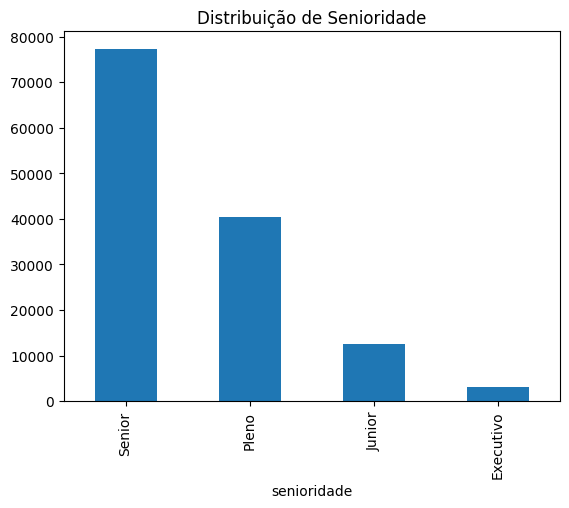

In [65]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de Senioridade")

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='senioridade', ylabel='usd'>

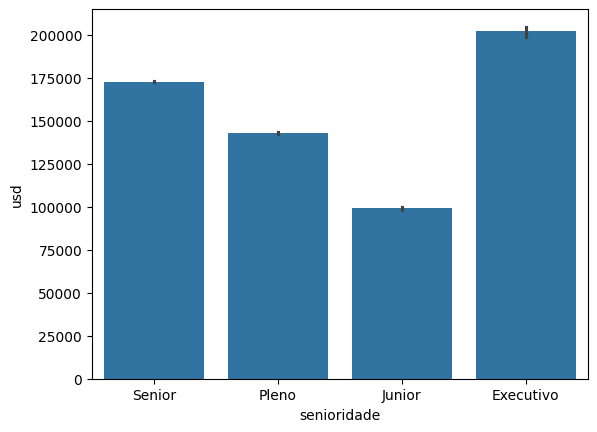

In [67]:
sns.barplot(x='senioridade', y='usd', data=df_limpo)

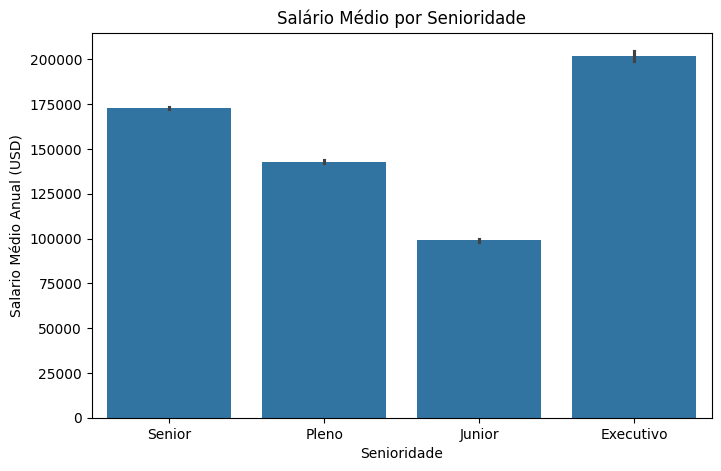

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salario Médio Anual (USD)")
plt.show()

In [69]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
display(ordem)

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

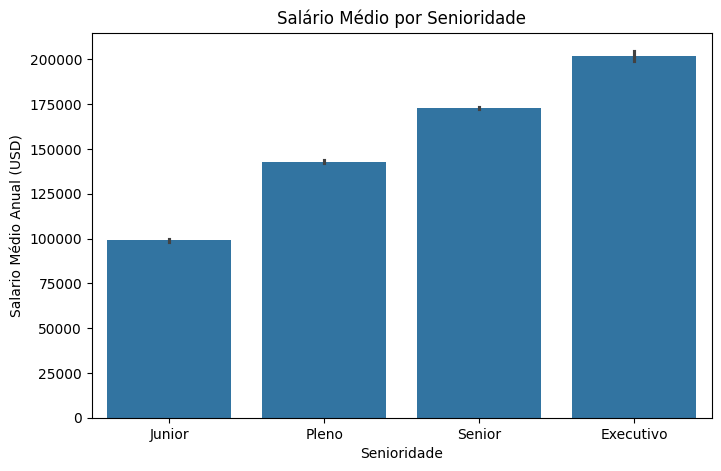

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd',order=ordem)
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salario Médio Anual (USD)")
plt.show()

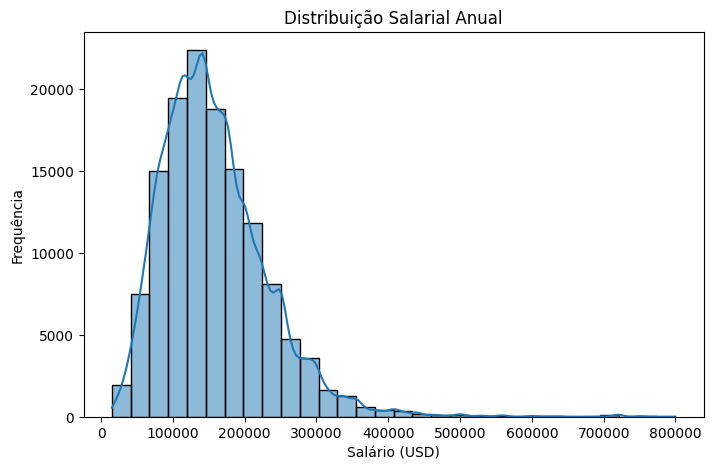

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df_limpo['usd'], bins=30, kde=True)
plt.title("Distribuição Salarial Anual")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

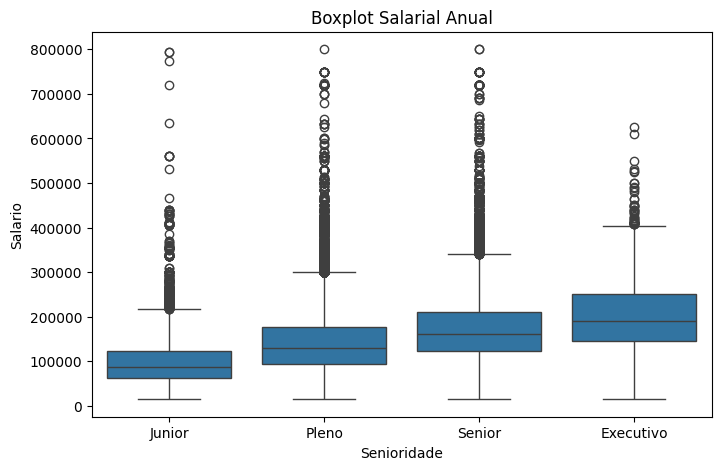

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd',order=ordem)
plt.title("Boxplot Salarial Anual")
plt.xlabel("Senioridade")
plt.ylabel("Salario")
plt.show()

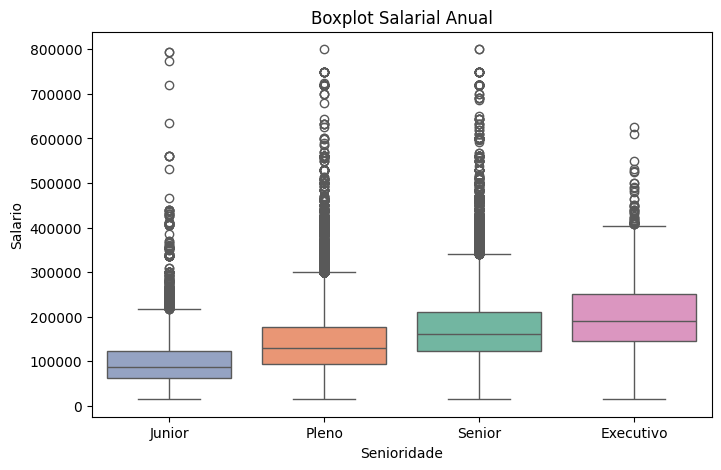

In [73]:
#Adicionando cores
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd',order=ordem,palette='Set2', hue='senioridade')
plt.title("Boxplot Salarial Anual")
plt.xlabel("Senioridade")
plt.ylabel("Salario")
plt.show()

In [74]:
import plotly.express as px

In [75]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title="Média Salarial por Senioridade",
             labels={'senioridade' : 'Nivel de Senioridade', 'usd': 'Média Salarial Anual (USD)'})
fig.show()

In [76]:
remoto_contagem = df_limpo['remoto'].value_counts(ascending=False).reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig_pizza = px.pie(remoto_contagem,
                names='tipo_trabalho',
                values='quantidade',
                title='Quantidade por tipo de trabalho',
                hole=0.5
                   
                   )
fig_pizza.update_traces(textinfo='percent+label')
fig_pizza.show()

### Desafio: Exibir Média Salarial por País para Data Scientist

In [77]:
data_scientist_region = df_limpo[df_limpo['cargo'] == 'Data Scientist']


In [78]:
data_scientist_region

,ano,senioridade,contrato,cargo,salario,moeda_salario,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Media
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Media
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Media
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Media
65,2025,Senior,Tempo Integral,Data Scientist,258000,USD,258000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133339,2021,Senior,Tempo Integral,Data Scientist,168000,USD,168000,JP,Presencial,JP,Pequena
133340,2021,Pleno,Tempo Integral,Data Scientist,160000,SGD,119059,SG,Remoto,IL,Media
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena


In [79]:
data_scientist_region = data_scientist_region.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

In [80]:
fig = px.bar(data_scientist_region,
             x='residencia',
             y='usd',
             title="Média Salarial por Pais para Data Scientist",
             labels={'residencia' : 'País', 'usd': 'Média Salarial Anual (USD)'})
fig.show()

In [81]:
import pycountry

#Função para converter ISO-2 para ISO-3

def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)




In [82]:
data_scientist_region = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = data_scientist_region.groupby('residencia_iso3')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.choropleth(media_ds_pais,
             locations='residencia_iso3',
             color='usd',
             color_continuous_scale='rdylgn',
             title="Salário médio de Cientista de Dados por país",
             labels={'residencia' : 'País', 'usd': 'Média Salarial Anual (USD)'})
fig.show()

In [83]:
df_limpo.to_csv('dados-imersao-final.csv', sep=',', encoding='UTF-8', index=False)